In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_1 = pd.read_csv("train.csv")
df_2 = pd.read_csv("test.csv")
if 'SalePrice' not in df_2.columns:
    df_2['SalePrice'] = 0
df = pd.concat([df_1, df_2], axis = 0)
df = df.set_index('Id')

In [3]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_null  = df[df.isnull().sum()[df.isnull().sum()>0].index]

In [5]:
df_null.head()

,MSZoning,LotFrontage,Alley,Utilities,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,...,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PoolQC,Fence,MiscFeature,SaleType
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,65.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,...,2003.0,RFn,2.0,548.0,TA,TA,NaN,NaN,NaN,WD
2,RL,80.0,NaN,AllPub,MetalSd,MetalSd,NaN,0.0,Gd,TA,...,1976.0,RFn,2.0,460.0,TA,TA,NaN,NaN,NaN,WD
3,RL,68.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,...,2001.0,RFn,2.0,608.0,TA,TA,NaN,NaN,NaN,WD
4,RL,60.0,NaN,AllPub,Wd Sdng,Wd Shng,NaN,0.0,TA,Gd,...,1998.0,Unf,3.0,642.0,TA,TA,NaN,NaN,NaN,WD
5,RL,84.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,...,2000.0,RFn,3.0,836.0,TA,TA,NaN,NaN,NaN,WD


<Axes: ylabel='Id'>

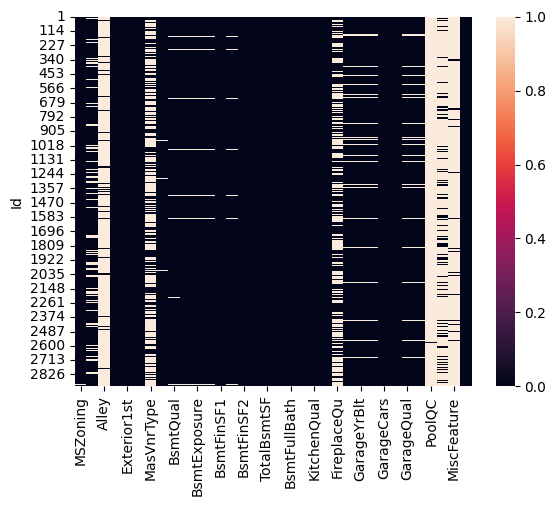

In [6]:
sns.heatmap(df_null.isnull())

In [7]:
df_objects =  df[df.select_dtypes(include=['object']).columns]
df = df.drop(df[df_objects.isna().sum()[df_objects.isna().sum() > 1100].index], axis = 1)

In [8]:
df_objects = df_objects.drop(df_objects[df_objects.isna().sum()[df_objects.isna().sum() > 1100].index], axis = 1)

df_objects = df_objects.fillna('null')

df_objects_encoded = pd.get_dummies(df_objects)

In [9]:
df_objects['Utilities'].value_counts()

Utilities
AllPub    2916
null         2
NoSeWa       1
Name: count, dtype: int64

In [10]:
for i in df_objects_encoded.columns:
    if 'null' in i:
        df_objects_encoded = df_objects_encoded.drop(i, axis = 1)
        print(i)

MSZoning_null
Utilities_null
Exterior1st_null
Exterior2nd_null
BsmtQual_null
BsmtCond_null
BsmtExposure_null
BsmtFinType1_null
BsmtFinType2_null
Electrical_null
KitchenQual_null
Functional_null
GarageType_null
GarageFinish_null
GarageQual_null
GarageCond_null
SaleType_null


In [ ]:
new_df = pd.concat([df, df_objects_encoded], axis = 1)

In [ ]:
len(new_df.columns)

In [ ]:
len(df.columns), len(df_objects_encoded.columns)

In [ ]:
new_df = new_df.drop(df.select_dtypes(include=['object']), axis = 1)

new_df.isna().sum()[new_df.isna().sum() > 0]

In [ ]:
Mode_columns = ['GarageCars', 'GarageYrBlt', 'BsmtFullBath', 'BsmtHalfBath']
Mean_columns = ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                'TotalBsmtSF', 'GarageArea']

for i in Mode_columns:
    new_df[i] = new_df[i].fillna(new_df[i].mode()[0])

for i in Mean_columns:
    new_df[i] = new_df[i].fillna(np.round(new_df[i].mean()))

new_df.isna().sum()[new_df.isna().sum() > 0] 


In [ ]:
training_data = new_df[0:len(df_1)]
testing_data = new_df[len(df_1):]
testing_data = testing_data.drop(columns='SalePrice')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
x = training_data.drop(columns='SalePrice')
y = training_data['SalePrice']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
y_train = np.reshape(y_train,(-1, 1))
Y_test = np.reshape(y_test,(-1, 1))
x_train.shape, y_train.shape

## Linear Regression

In [ ]:

lr = LinearRegression()
lr.fit(x, y)
y_pred = lr.predict(x_test)
rmse_lr = root_mean_squared_error(y_test, y_pred)
rmse_lr

## Ridge Regression

In [ ]:
ridge = Ridge(alpha=10)
ridge.fit(x_train, y_train)

y_pred = ridge.predict(x_test)
rmse_ridge = root_mean_squared_error(y_test, y_pred)

rmse_ridge


## Lasso Regression

In [ ]:
lasso = Lasso(alpha=0.01, max_iter=20000)
lasso.fit(x_train, y_train)

y_pred = lasso.predict(x_test)
rmse_lasso = root_mean_squared_error(y_test, y_pred)

rmse_lasso


## ElasticNet

In [ ]:
enet = ElasticNet(alpha=0.01, l1_ratio=0.5, max_iter=20000)
enet.fit(x_train, y_train)

y_pred = enet.predict(x_test)
rmse_enet = root_mean_squared_error(y_test, y_pred)

rmse_enet


## Decision Tree Regressor

In [ ]:
dt = DecisionTreeRegressor(max_depth=20, random_state=42)
dt.fit(x_train, y_train)

y_pred = dt.predict(x_test)
rmse_dt = root_mean_squared_error(y_test, y_pred)

rmse_dt


## Random Forest Regressor

In [ ]:
rf = RandomForestRegressor(
    n_estimators=500,
    max_depth=None,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1
)
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)
rmse_rf = root_mean_squared_error(y_test, y_pred)

rmse_rf


## Gradient Boosting Regressor

In [ ]:
gbr = GradientBoostingRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)
gbr.fit(x_train, y_train)

y_pred = gbr.predict(x_test)
rmse_gbr = root_mean_squared_error(y_test, y_pred)

rmse_gbr


## KNN Regressor

In [ ]:
knn = KNeighborsRegressor(
    n_neighbors=7,
    weights="distance"
)
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)
rmse_knn = root_mean_squared_error(y_test, y_pred)

rmse_knn


## Support Vector Regressor (SVR)

In [ ]:
svr = SVR(
    C=30,
    epsilon=0.1,
    kernel="rbf"
)
svr.fit(x_train, y_train)

y_pred = svr.predict(x_test)
rmse_svr = root_mean_squared_error(y_test, y_pred)

rmse_svr

## XGBoost Regression

In [ ]:
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.1, random_state=42)
xgb.fit(x, y)
y_pred = xgb.predict(x_test)
root_mean_squared_error(y_test, y_pred)

## Random Forest Regression

In [ ]:
rfr = RandomForestRegressor(n_estimators=1000)
rfr.fit(x, y)
y_pred = rfr.predict(x_test)
root_mean_squared_error(Y_test, y_pred)